# Advanced Fisheries Economics Workshop

# Population Biology Review

In [1]:
import handcalcs.render
import math as math
from sympy import * #symbolic algebra package
import numpy as np #numerical python packagee
import matplotlib.pyplot as plt #matplotlib is a plotting package
%matplotlib inline  
# without this plots are popouts

Fisheries  and biology in general involves growth of organism and populations. the stock of fish changes overtime, 
it increases through natural growth and decreases through natural mortality and fishing.

We will start by reviewing some basic models of poulation growth. You have most likely seen versions of these before but not to the elvel of detail we will cover here.


# Logistic Growth


Let us first write some simple python code to simulate logistic growth. We will do this in stages.

Let's start with exponential growth

$x(t) = x_0 e^{rt}$

$x_0$ is an initial value (The starting value of say a stock of fish) without limits to food, resources (nutrients), space, predation, etc. the stock would continue to grow. Let us plot this

Text(0.5, 1.0, 'Exponetial growth')

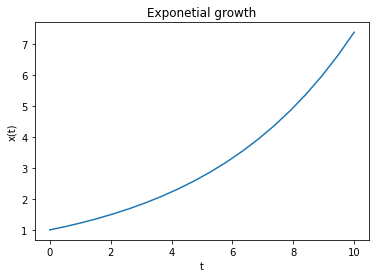

In [2]:
x0 = 1 #choose a starting value
r = 0.2 #choose a growth rate
t = np.linspace(0,10,20) #define an x-axis
x = x0*np.exp(r*t) #function to plot
plt.plot(t,x) # plot pairs of values
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Exponetial growth")


## What is the rate of change of this over time?


To determine the rate of change we need to examine how the stock changes with time


In [3]:
x0, r, t = symbols('x0 r t')
deriv = diff(x0*exp(r*t),t) #differrentiates the function, 
#calculates the slop of the curve at the point t
deriv

r*x0*exp(r*t)

Now we need to substitute in $x(t)$. to get $\frac{dx(t)}{dt} = rx(t)$

divide both sides by $x(t)$ to get a rate of change

$\frac{1}{x(t)}\frac{dx(t)}{dt} = r$ Basically this is like a percentage change.


Becauase stocks can't grow forever we penalize their growth by a mortality term $r \frac{x(t)^2}{K}$ where $K$ called the carrying capcity is a measure of the available resources need to sustain the population.

Combining this we get 

$\frac{dx(t)}{dt} = r x(t)(1-\frac{x(t)}{K})$

where $\frac{x(t)}{K}$ is a density dependent mortality term.

This equation is a differential equation (time is continuous), it contain a (first) derivative $\frac{dx(t)}{dt}$, so $x(t)$ has been differentiated once, so it is a first-order differential equation. The derivative is an ordinary derivative because $x$ depends only on $t$ and not something else. If it depended say on the age of fish $a$ so we had 
$x(t,a)$ then it would be a partial differential equation. Also when you expand it you see it is quadratic in $x(t)$ so it is a non-linear differential equation. 

We will come back to differential equations later.



## Discrete-time dynamics


We now turn to discre-time. Instead of using a derivative ($\frac{dx(t)}{dt} = \lim_{h \rightarrow 0} = 
\frac{x(t+h) - x(t)}{h}$) we use $h=1$ and $x_{t+1} - x_{t}$ to capture the change in the stock.

So we have

$x_{t+1} - x_{t} = r x_{t} (1 - \frac{x_{t}}{K})$

We will see later why this is problematic and sometimes a point of contention between biologists and economists (the biologists are correct in this case).

Let's see how we can numerically compute the above equation.


In [4]:
#Constants 
r = 1.8 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
x[0] = x0 # pass initial value to vector
for i in range(0,len(x)-1):
     x[i+1] = x[i] + r*x[i]*(1-x[i]/K)
print(x) 


[  1.           2.782        7.65028857  20.36732352  49.56160424
  94.5581448  103.82043597  96.68092806 102.45696526  97.92576759]


Now plot the result

Text(0, 0.5, 'stock x')

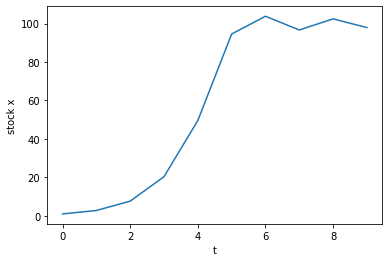

In [5]:
plt.plot(x)
plt.xlabel("t")
plt.ylabel("stock x")

# What does this look like if time is continuous

Use the previous code but modify it slightly

To make time continuous we will usse a simple numerical technique called Euler's method

[ 9.9 10.9 11.9 12.9 13.9 14.9 15.9 16.9 17.9] [ 1.          2.9602      6.68769288 13.35607222 23.91300663 37.02548178
 47.16690516 50.34107676 50.4976966 ]


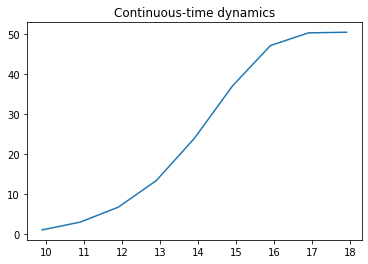

In [6]:
# Constants 
r = 0.2 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
x0 = 1 #initial value
n = 10 # note this should be (b - x0)/h so h = (b - x0)/n
#initialize values
x = np.zeros(n)  # vector of zeroes
t = np.zeros(n)
x[0] = x0 # pass initial value to vector
t[0] = 1
b = 100 # upper bound on the interval for x

h = (b - x0)/n

for i in range(0,n-1):
     t[i] = i + h #tiemstep + or * can be used
     x[i+1] = x0 + h*(r*x[i]*(1-x[i]/K))
print(t[0:n - 1],x[0:n - 1]) #print values
plt.plot(t[0:n - 1],x[0:n - 1])
plt.title('Continuous-time dynamics')
plt.show()

## Analytical solution


We can solve $\frac{dx}{dt} = r x(t)(1-\frac{x(t)}{K})$exactly without using numbers, we will use the Python SymPy module to do this.

We first define an unknown function for the stock $x(t)$ let's call this $f$ (for fish or for function, 
so as not to confuse it with $x$ above or further below) as a function of time that we wish to solve for.

We will make us of symbolic algebra (math with symbols) rahtner than numerical mathematics (math with numbers) to do our analysis.

In [7]:
f, t, r, K = symbols('f t r K') #first define symbols
f = Function('f') #defien the symbol f as a function
ode = Eq(diff(f(t), t), r*f(t)*(1 - f(t)/K)) # ode = ordinary differential equation, define our growth equation
ode

Eq(Derivative(f(t), t), r*(1 - f(t)/K)*f(t))

In [8]:
sol = dsolve(ode, f(t))  # solve the equation
sol

Eq(f(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))

This is the solution! It gives us a formula for the stock of fish $f(t) = x(t)$ at every point in time. to calculate the stock at a point in time subsitute in the time $t$, the growth rate of the stock and the carrying capcity $K$.
We will see later that the carrying capacity of the stock $K$ is jus tthe unfished biomass in steady-state (when the stock is constant through time). 

To calculate the stock (quantity of fish) we also need to know $C_1$. How do we find this number?


To find $C_1$ set $f(t) = x(0) = x0$ and $t= 0$ and solve for $C_1$


In [9]:
t = Symbol('t')
x0 = Symbol('x0')
eq1 = Eq(sol.rhs.subs(t,0),x0) 
eq1

Eq(K*exp(C1*K)/(exp(C1*K) - 1), x0)

Define things that have not yet been defined as symbols

In [10]:
C1 = symbols('C1')
C2 = solve(eq1,C1)
C2

[log(x0/(-K + x0))/K]

Now substitute the unknow terms

In [11]:
x = Symbol('x(t)')
eq3 = Eq(sol.rhs.subs(C1,C2),x)
logequation = simplify(eq3.subs({Symbol('C1'): C2[0]}) ) #substitute C! and simplify
logequation

Eq(x(t), K*x0*exp(r*t)/(K + x0*exp(r*t) - x0))

On the right hand-side we see only things we know, and on the left hand-side the stock at time $t$ whcih was unknown but after solving the equation is now known.